In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

- 강서_데이터

In [18]:
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))

3385613


# 각 구별 데이터 시각화

In [2]:
print('&')

&


# 각 기준별 시각화
- 시간별 데이터

In [4]:
def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum()

In [6]:
import plotly.express as px

fig = px.bar(강서_시간대별_건수2, x=강서_시간대별_건수2.index, y=강서_시간대별_건수2.values, 
             title='시간대별 따릉이 확인', 
             labels={'대여 건수': '대여 건수', 'index': '시간'})
fig.update_layout(xaxis_title='시간', yaxis_title='대여 건수', height=800)
fig.update_xaxes(tickangle=90)

fig.show()


# 구간 시간별
- 출근 시간 : 06:00~10:00
- 퇴근 시간 : 17:00~21:00

In [8]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00' # 퇴근시간
    else:
        return '21:00~24:00'
    
강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()


In [9]:
import plotly.express as px 


fig = px.bar(강서_시간대별_건수, x=강서_시간대별_건수.index, y=강서_시간대별_건수.values, 
             title='시간대별 따릉이 확인', 
             labels={'전체_건수': '대여 건수', 'index': '시간대별'})
fig.update_layout(xaxis_title='시간대별', yaxis_title='대여 건수', height = 800 )
fig.update_xaxes(tickangle=90)

fig.show()


In [17]:
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,한시간_구간,시간대_구간
0,2023--0-5-,200,ST-2037,ST-2037,1,1,30,0,0,0,02:00~03:00,00:00~06:00
1,2023--0-5-,1155,ST-824,ST-824,1,1,80,0,0,0,11:00~12:00,10:00~17:00
2,2023--0-5-,1230,ST-829,ST-829,1,1,111,0,0,0,12:00~13:00,10:00~17:00
3,2023--0-5-,1340,ST-2611,ST-2611,1,1,10,0,0,0,13:00~14:00,10:00~17:00
4,2023--0-5-,1635,ST-2031,ST-2031,1,1,170,0,0,0,16:00~17:00,17:00~21:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3385608,2023--0-8-,1610,ST-2056,ST-2993,4,30,2837,1,0,0,16:00~17:00,17:00~21:00
3385609,2023--0-8-,1705,ST-1712,ST-2045,4,16,3487,1,0,0,17:00~18:00,17:00~21:00
3385610,2023--0-8-,2330,ST-513,ST-2482,4,26,3464,1,0,0,23:00~24:00,21:00~24:00
3385611,2023--0-8-,830,ST-1506,ST-3068,5,26,4519,1,0,0,08:00~09:00,06:00~10:00


- 요일별 시각화

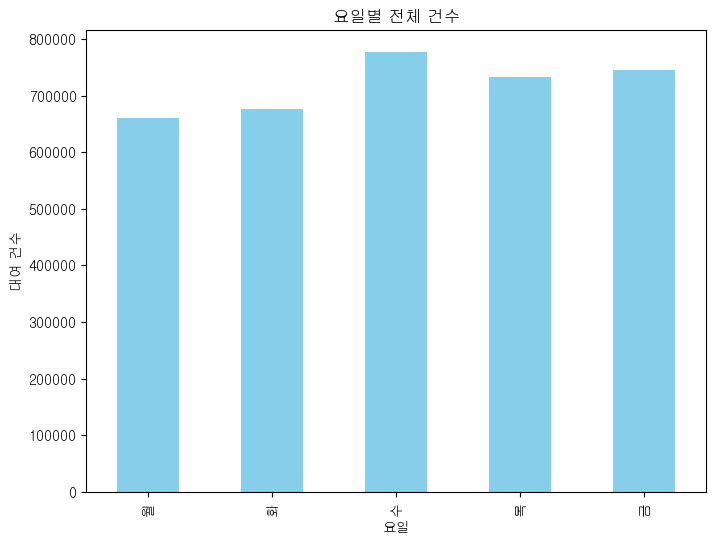

In [21]:

import matplotlib.pyplot as plt
import pandas as pd

강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'], format='%Y-%m-%d')

# 기준_날짜 열에서 요일을 추출하여 새로운 열 추가
강서_데이터['요일'] = 강서_데이터['기준_날짜'].dt.day_name()
# 영어 요일명을 한글 요일명으로 변환하는 사전 생성
영어_한글_요일_매핑 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',

}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['요일'] = 강서_데이터['요일'].map(영어_한글_요일_매핑)

# 요일별 전체 건수 통계 계산
요일별_통계 = 강서_데이터.groupby('요일')['전체_건수'].sum()


# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
요일별_통계[요일_순서].plot(kind='bar', color='skyblue')
plt.title('요일별 전체 건수')
plt.xlabel('요일')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

## 강서구 대여소 쏠림현상 확인

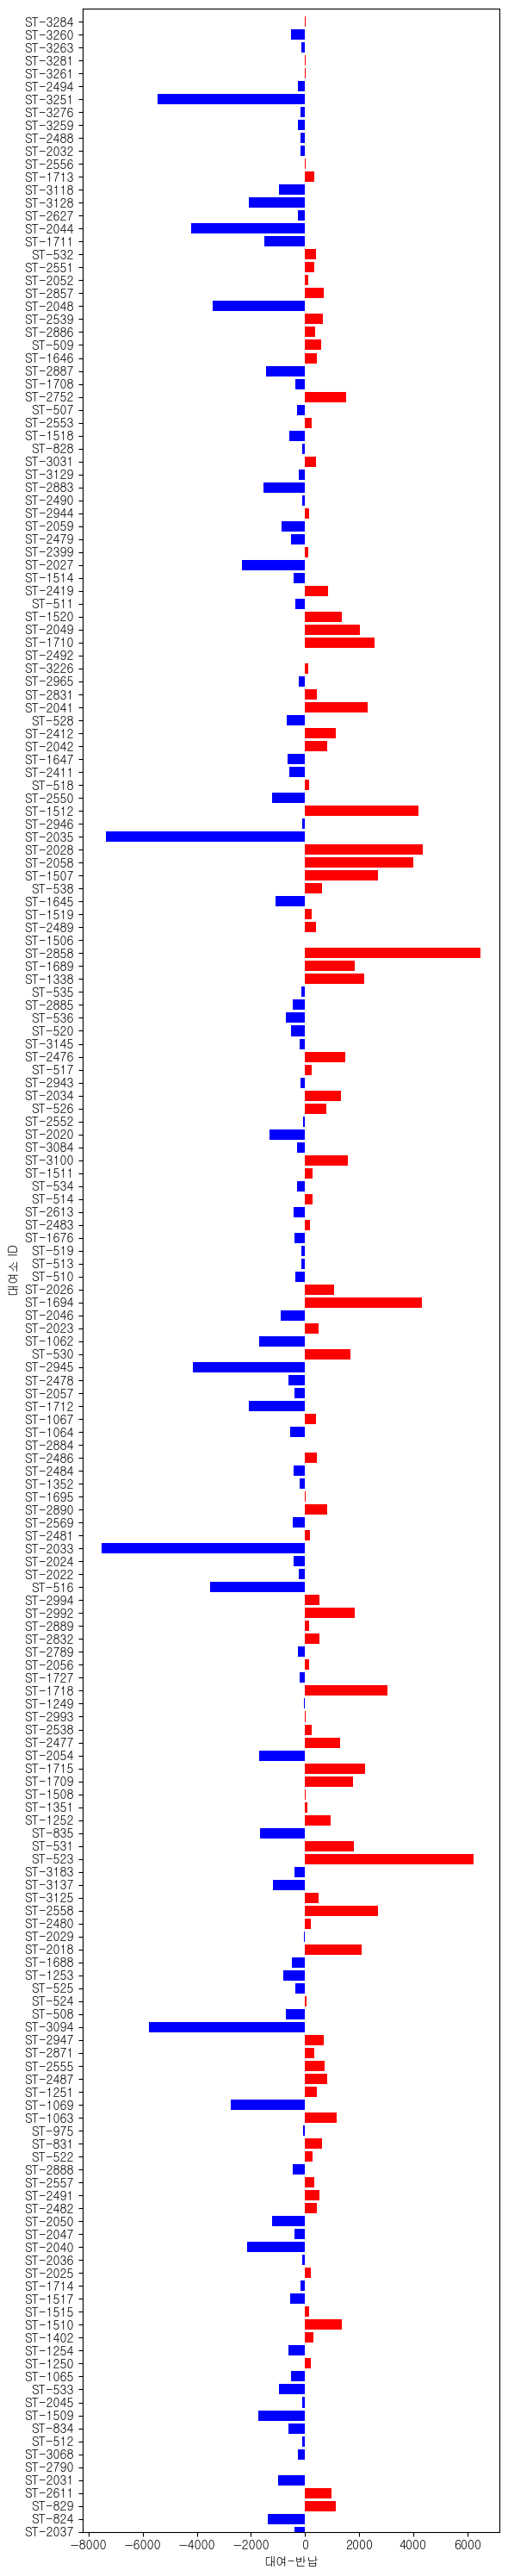

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

# 강서 대여소 ID 정보 불러옴
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

# 강서 대여소 이용 현황 정보 불러옴
# 강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

# 시작 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 대여한 총량)
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 반납한 총량)
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()

# 강서구에 위치한 대여소 ID 리스트업
len(강서_데이터['시작_대여소_ID'].unique())
# 강서구_대여소_ID_list == '강서구에 위치한 대여소 ID 리스트'로 변수 지정
강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()

# 대여소 ID를 인덱스로 가지는 시작횟수 리스트 생성
temp_list = []
for i in range(len(강서_대여소_ID_list)):
    temp_list.append(시작대여소별_전체횟수[강서_대여소_ID_list[i]])

# start_count == 대여소 ID를 인덱스로 가지는 시작횟수 리스트로 시리즈 변수 생성
start_count = temp_list.copy()

# 대여소 ID를 인덱스로 가지는 종료횟수 리스트 생성
temp_list2 = []
for i in range(len(강서_대여소_ID_list)):
    temp_list2.append(종료대여소별_전체횟수[강서_대여소_ID_list[i]])

# end_count == 대여소 ID를 인덱스로 가지는 종료횟수 리스트로 시리즈 변수 생성
end_count = temp_list2.copy()

# 강서_대여소_정보 DataFrame 생성
# column = ['대여소_ID', '대여건수', '반납건수']
강서_대여소_정보 = {'대여소_ID' : 강서_대여소_ID_list, '대여건수' : start_count, '반납건수' : end_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

# '대여-반납' column 생성 >> 쏠림 현상 유무 확인 기준 지표
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']


# '대여-반납'값 : x축 / 대여소_ID : y축 을 가지는 그래프 생성
import matplotlib.font_manager as fm

colors = ['red' if val > 0 else 'blue' for val in 강서_대여소_정보['대여-반납']]
fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'], color = colors )
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 195)


plt.tight_layout()
plt.show()